In [71]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier

from sklearn.model_selection import train_test_split

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import seaborn as sns
import warnings


### setting random seed

In [135]:
np.random.seed(98)

## Dataset Preparation

In [124]:
dataframe = pd.read_csv("Breast Cancer Wisconsin (Diagnostic) Data Set.csv")

In [129]:
dataframe

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,NaN
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,NaN
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,NaN
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,NaN


In [137]:
df = dataframe.copy()
df['diagnosis'].replace(['B','M'],[0,1],inplace=True)

In [138]:
df = df.drop('id', axis=1)
df = df.drop('Unnamed: 32', axis=1)

In [139]:
df.isnull().values.sum()

0

In [140]:
df

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,1,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,1,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,1,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,1,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


### Setting Labels

In [132]:
y = df.diagnosis.values

In [133]:
df = df.drop('diagnosis', axis=1)

In [134]:
corr_mat = df.corr().abs()
corr_mat

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
radius_mean,1.000000,0.323782,0.997855,0.987357,0.170581,0.506124,0.676764,0.822529,0.147741,0.311631,...,0.969539,0.297008,0.965137,0.941082,0.119616,0.413463,0.526911,0.744214,0.163953,0.007066
texture_mean,0.323782,1.000000,0.329533,0.321086,0.023389,0.236702,0.302418,0.293464,0.071401,0.076437,...,0.352573,0.912045,0.358040,0.343546,0.077503,0.277830,0.301025,0.295316,0.105008,0.119205
perimeter_mean,0.997855,0.329533,1.000000,0.986507,0.207278,0.556936,0.716136,0.850977,0.183027,0.261477,...,0.969476,0.303038,0.970387,0.941550,0.150549,0.455774,0.563879,0.771241,0.189115,0.051019
area_mean,0.987357,0.321086,0.986507,1.000000,0.177028,0.498502,0.685983,0.823269,0.151293,0.283110,...,0.962746,0.287489,0.959120,0.959213,0.123523,0.390410,0.512606,0.722017,0.143570,0.003738
smoothness_mean,0.170581,0.023389,0.207278,0.177028,1.000000,0.659123,0.521984,0.553695,0.557775,0.584792,...,0.213120,0.036072,0.238853,0.206718,0.805324,0.472468,0.434926,0.503053,0.394309,0.499316
compactness_mean,0.506124,0.236702,0.556936,0.498502,0.659123,1.000000,0.883121,0.831135,0.602641,0.565369,...,0.535315,0.248133,0.590210,0.509604,0.565541,0.865809,0.816275,0.815573,0.510223,0.687382
concavity_mean,0.676764,0.302418,0.716136,0.685983,0.521984,0.883121,1.000000,0.921391,0.500667,0.336783,...,0.688236,0.299879,0.729565,0.675987,0.448822,0.754968,0.884103,0.861323,0.409464,0.514930
concave points_mean,0.822529,0.293464,0.850977,0.823269,0.553695,0.831135,0.921391,1.000000,0.462497,0.166917,...,0.830318,0.292752,0.855923,0.809630,0.452753,0.667454,0.752399,0.910155,0.375744,0.368661
symmetry_mean,0.147741,0.071401,0.183027,0.151293,0.557775,0.602641,0.500667,0.462497,1.000000,0.479921,...,0.185728,0.090651,0.219169,0.177193,0.426675,0.473200,0.433721,0.430297,0.699826,0.438413
fractal_dimension_mean,0.311631,0.076437,0.261477,0.283110,0.584792,0.565369,0.336783,0.166917,0.479921,1.000000,...,0.253691,0.051269,0.205151,0.231854,0.504942,0.458798,0.346234,0.175325,0.334019,0.767297


## Feature Selection

#### Listing all the features with more than 95% correlation to another feature


In [104]:
upper_tri = corr_mat.where(np.triu(np.ones(corr_mat.shape),k=1).astype(bool))
to_drop = [column for column in upper_tri.columns if any(upper_tri[column] > 0.95)]
print(to_drop)

['perimeter_mean', 'area_mean', 'perimeter_se', 'area_se', 'radius_worst', 'perimeter_worst', 'area_worst']


In [105]:
print(f"Number of features before removing redundant features: {len(df.columns)}")
df_pre = df.drop(to_drop, axis=1)
print(f"Number of features after removing redundant features: {len(df_pre.columns) }")

Number of features before removing redundant features: 30
Number of features after removing redundant features: 23


### Setting dataset X_train

In [106]:
X = df_pre

### Scaling the data 

In [107]:
scaler = StandardScaler().fit(X)
X_scaled = scaler.transform(X)

In [141]:
def classifier_comparation(X, y):
    
    warnings.filterwarnings("ignore", category=FutureWarning, module='scipy')
    warnings.filterwarnings("ignore", category=FutureWarning)
    
    
    method_names = ['MLP','Naive Bayes','Logistic Regression', 'kNN','SVM', 'Decision Tree', 'Random Forest', 'AdaBoost' ]
    method_ma_scores = []
    
    ######################################## DATASET SPLITTING ########################################
    x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
    
    ######################################## CLASSIFIERS #############################################

    clfs = [
        
        MLPClassifier((100, 50), max_iter=3000),
        GaussianNB(),
        LogisticRegression(),
        KNeighborsClassifier(n_neighbors=int(np.sqrt(x_train.shape[0]))),
        SVC(kernel='linear'),
        DecisionTreeClassifier(),
        RandomForestClassifier(),
        AdaBoostClassifier(n_estimators=250),
    ]
    
    ######################################## plotting #############################################

    fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(7,10))

    for idx, (clf, ax) in enumerate(zip(clfs, axes.flatten())):
        clf.fit(x_train, y_train)
        clf_ma_score = 100*round(clf.score(x_test, y_test), 5)
        print(f"{method_names[idx]} Mean Accuracy Score: {clf_ma_score}%")
        print("-------------------------------------------------------------------")
        method_ma_scores.append(clf_ma_score)
        ConfusionMatrixDisplay.from_estimator(clf, x_test, y_test, ax=ax, display_labels=['Benign', 'Malignant'])
        ax.title.set_text(method_names[idx])
        
    plt.tight_layout()
    plt.show()
    print()
    plt.figure(figsize=(15,10))
    plt.ylim([85, 100])
    ax = plt.gca()
    ax.bar_label(plt.bar(method_names, method_ma_scores, width=0.3))
    plt.xlabel('Methods')
    plt.ylabel('Mean Accuracy')

## Without Feature Generation 

MLP Mean Accuracy Score: 97.368%
-------------------------------------------------------------------
Naive Bayes Mean Accuracy Score: 91.228%
-------------------------------------------------------------------
Logistic Regression Mean Accuracy Score: 94.73700000000001%
-------------------------------------------------------------------
kNN Mean Accuracy Score: 92.982%
-------------------------------------------------------------------
SVM Mean Accuracy Score: 94.73700000000001%
-------------------------------------------------------------------
Decision Tree Mean Accuracy Score: 92.982%
-------------------------------------------------------------------
Random Forest Mean Accuracy Score: 93.86%
-------------------------------------------------------------------
AdaBoost Mean Accuracy Score: 96.491%
-------------------------------------------------------------------


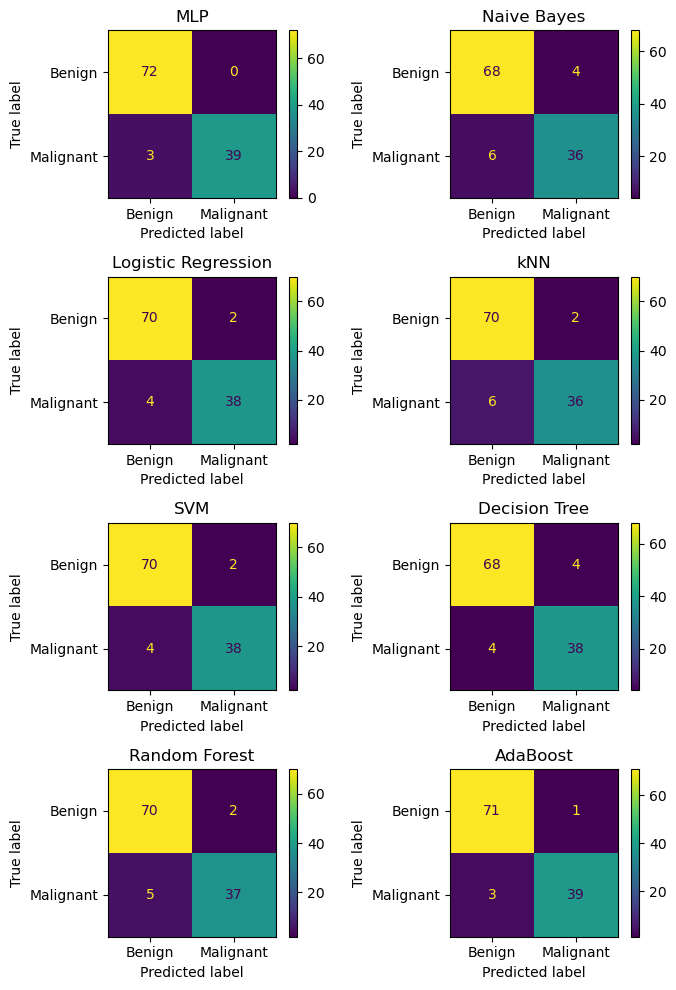

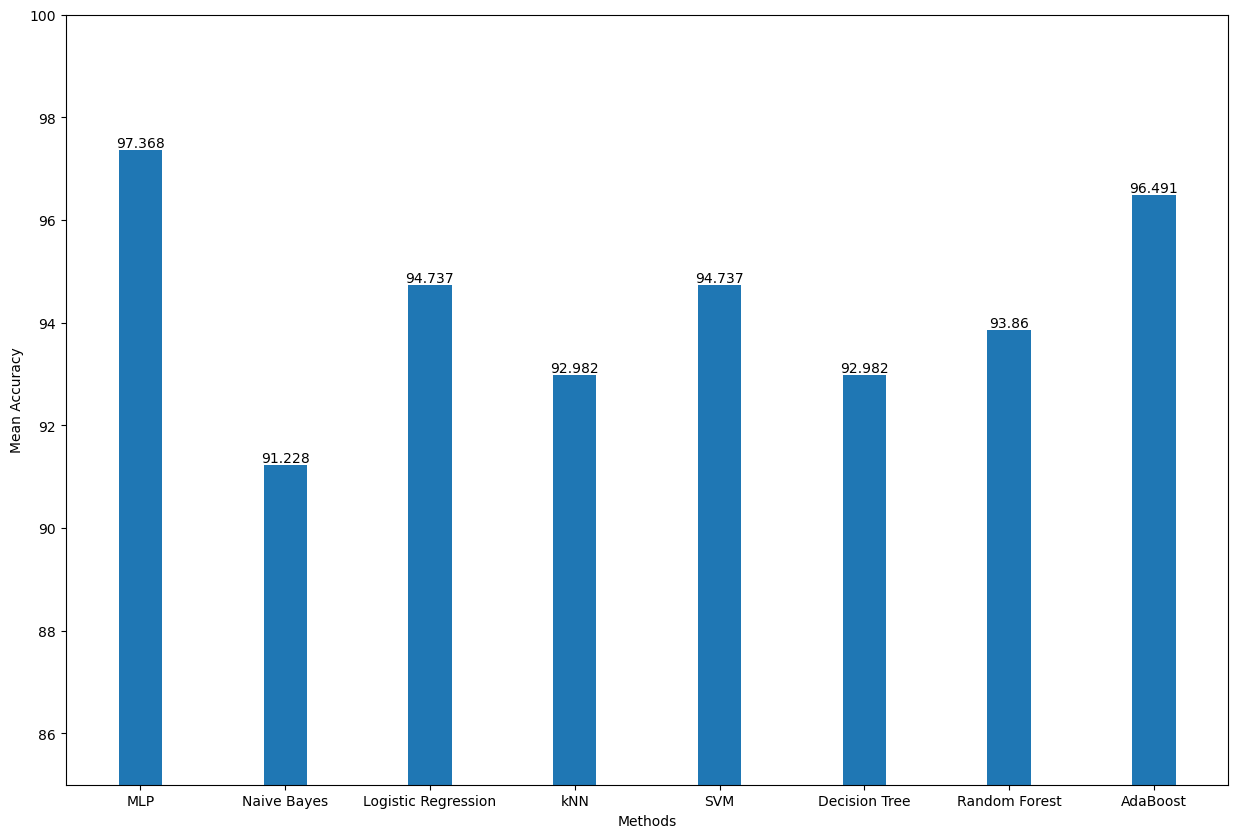

In [142]:
classifier_comparation(X_scaled, y)

## With Feature Generation with PCA

### two most informative features 

<AxesSubplot: >

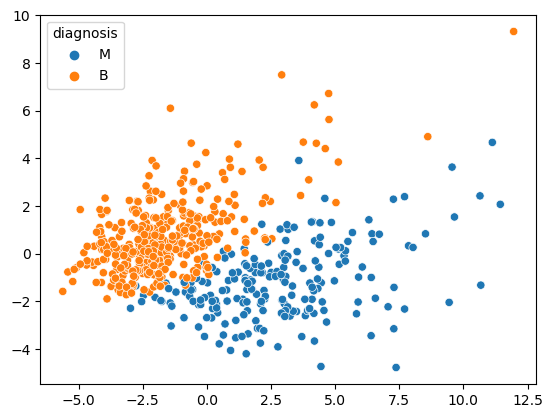

In [147]:
pca_2 = PCA(n_components=2).fit(X_scaled)
X_scaled_pca_2 = pca_2.transform(X_scaled)
sns.scatterplot(x=X_scaled_pca_2[:,0], y=X_scaled_pca_2[:,1], hue=dataframe.diagnosis)

### running PCA while preserving 90% of the information

In [144]:
pca = PCA(n_components=0.9).fit(X_scaled) 
X_scaled_pca = pca.transform(X_scaled)
print(f"Number of features:\n\tBefore PCA: {X_scaled.shape[1]}\n\tAfter PCA: {X_scaled_pca.shape[1]}")

Number of features:
	Before PCA: 23
	After PCA: 7


MLP Mean Accuracy Score: 96.491%
-------------------------------------------------------------------
Naive Bayes Mean Accuracy Score: 92.105%
-------------------------------------------------------------------
Logistic Regression Mean Accuracy Score: 95.614%
-------------------------------------------------------------------
kNN Mean Accuracy Score: 94.73700000000001%
-------------------------------------------------------------------
SVM Mean Accuracy Score: 94.73700000000001%
-------------------------------------------------------------------
Decision Tree Mean Accuracy Score: 94.73700000000001%
-------------------------------------------------------------------
Random Forest Mean Accuracy Score: 96.491%
-------------------------------------------------------------------
AdaBoost Mean Accuracy Score: 94.73700000000001%
-------------------------------------------------------------------


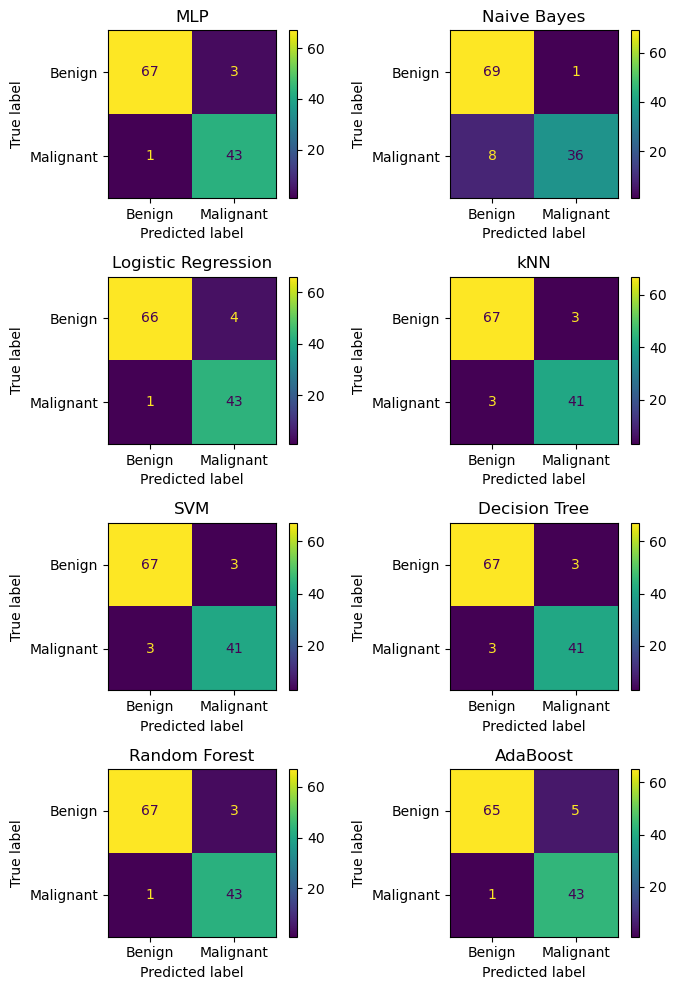

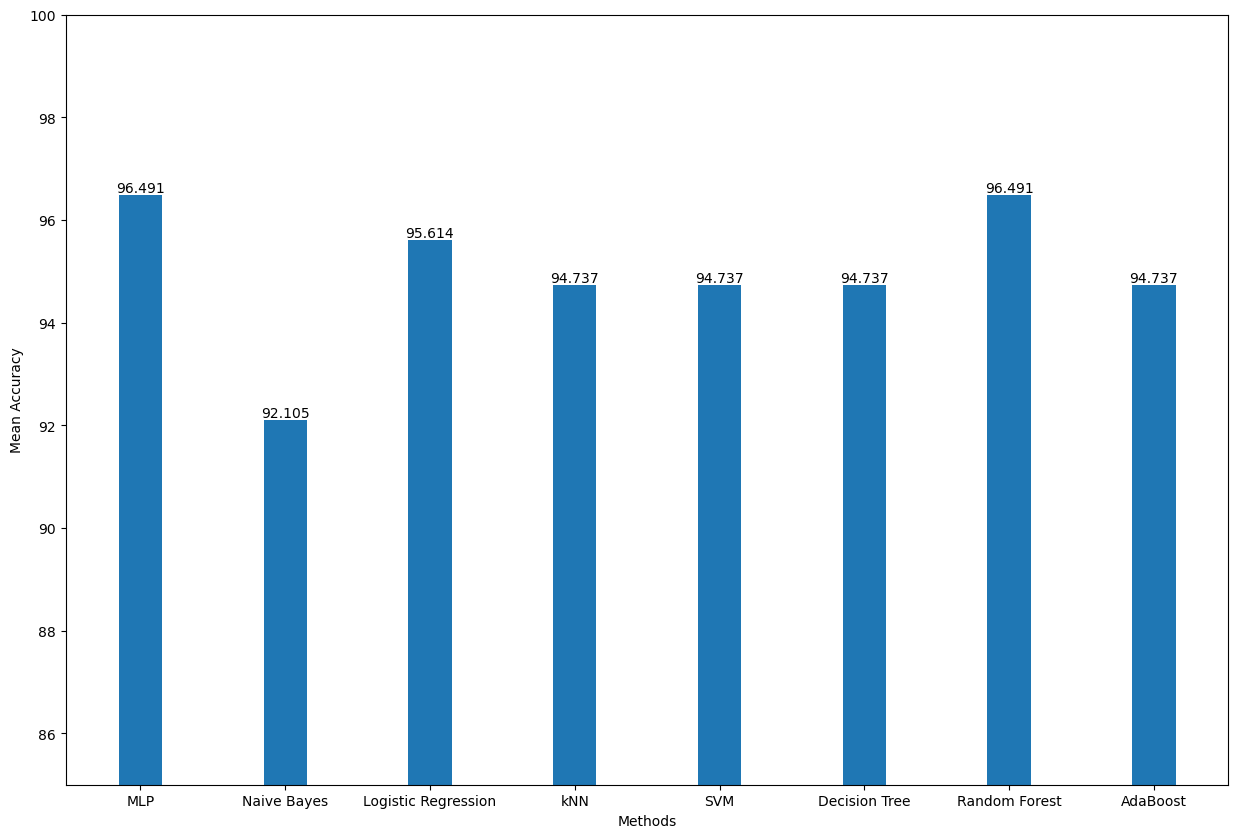

In [145]:
classifier_comparation(X_scaled_pca, y)